## Analysis of Determining Factors for IT Position Salaries in Europe in 2020

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset

df = pd.read_csv('IT Salary Survey EU 2020.csv')
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [3]:
# Find out how many rows and columns are in the dataset
df.shape

(1253, 23)

In [4]:
# Simple statistics
df.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


### Data cleaning and preparation

In [5]:
# counting missing values in a dataframe

df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [6]:
# Removed unused columns, and changed some long column names to shorter ones

df = df.drop(columns = ['Annual bonus+stocks one year ago. Only answer if staying in same country',
                        'Have you lost your job due to the coronavirus outbreak?', 
                        'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                        'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                        'Timestamp','Years of experience in Germany',
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR'])

df.rename(columns = {'Your main technology / programming language': 'Main technology', 'Position ': 'Position',
                     'Other technologies/programming languages you use often': 'Other technologies', 
                     'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly salary', 'Number of vacation days': 'Vacation days', 
                     'Main language at work': 'Language at work','Yearly bonus + stocks in EUR':'Yearly bonus',
                     'Total years of experience': 'Years of experience' }, inplace = True)

In [7]:
# Convert 'vacation days' and 'years of experience' columns to a numeric value and change the column type to integer

df['Vacation days'] = pd.to_numeric(df['Vacation days'], errors = 'coerce').fillna(0).astype(int)
df['Years of experience'] = pd.to_numeric(df['Years of experience'], errors = 'coerce').fillna(0).astype(int)
df['Age'] = df['Age'].fillna(0).astype(int)
df['Yearly salary'] = df['Yearly salary'].astype(int)

### Outliers detection

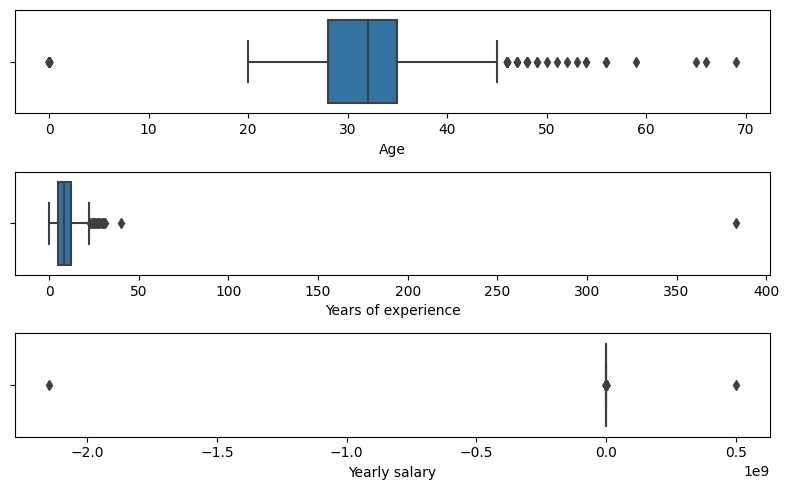

In [8]:
# Take several columns of type Integer that will be used
# Distribution of each selected column:

figure , ax = plt.subplots(3 , figsize = (8,5))
sns.boxplot(df["Age"] , ax = ax[0])
sns.boxplot(df["Years of experience"] , ax = ax[1])
sns.boxplot(df["Yearly salary"] , ax = ax[2])
plt.tight_layout()

In [9]:
# there are several outliers so they will be removed
# in the 'Yearly salary' column there are extreme outlier values, so it is detected by sorting the value from smallest to largest

df['Yearly salary'].sort_values()

473   -2147483648
883         10001
982         10001
366         10164
770         11000
          ...    
804        240000
630        250000
576        300000
778        850000
853     500000000
Name: Yearly salary, Length: 1253, dtype: int32

In [10]:
# Remove outliers by the index

df = df.drop(index = [473, 778, 853])

In [11]:
# Removing outliers using the IQR method

def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

In [12]:
# Distribution of values after outliers have been removed

age = outliers(df, 'Age')
experience = outliers(df, 'Years of experience')
salary = outliers(df, 'Yearly salary')

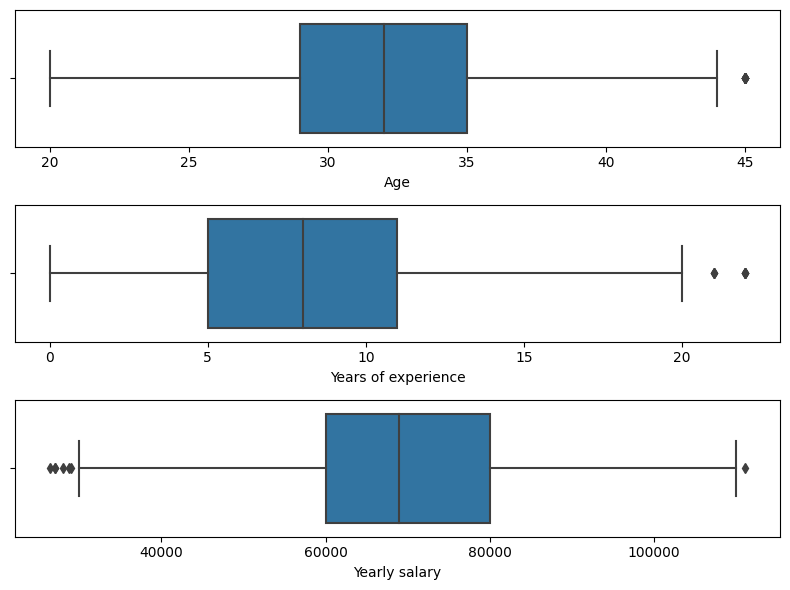

In [13]:
# Distribution of values in the boxplot after outliers are removed

figure , ax = plt.subplots(3 , figsize = (8,6))
sns.boxplot(data = age, x= 'Age', ax = ax[0])
sns.boxplot(data = experience, x= 'Years of experience', ax = ax[1])
sns.boxplot(data = salary, x= 'Yearly salary', ax = ax[2])
plt.tight_layout()

### Data Visualization

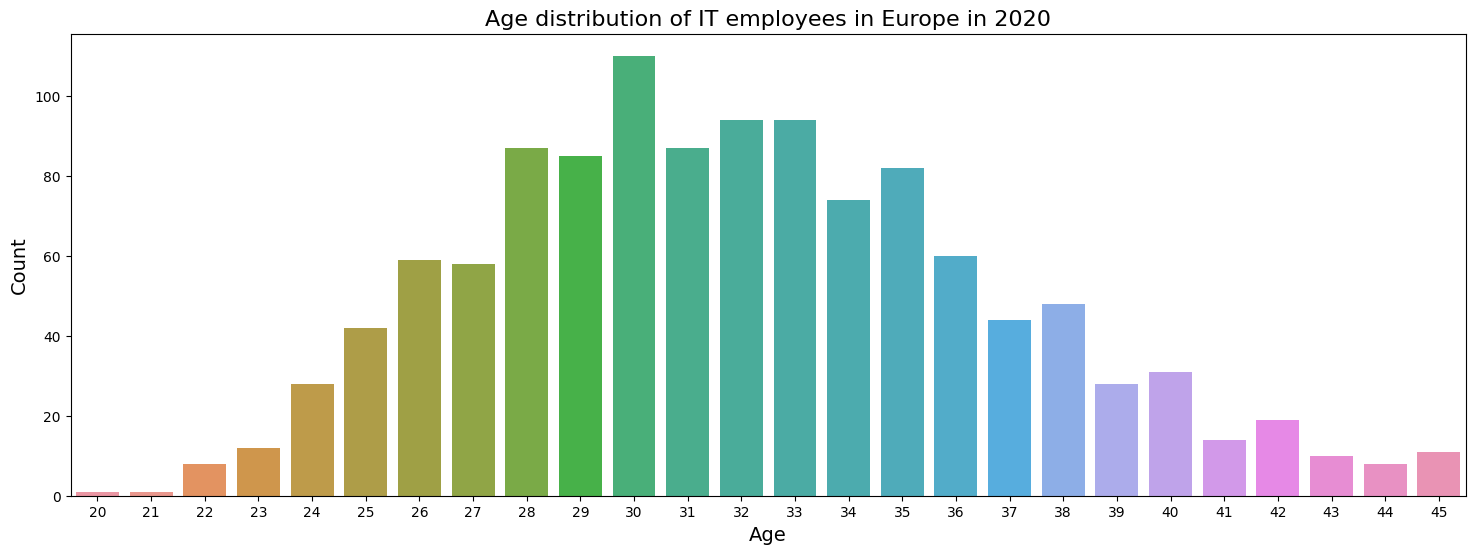

In [14]:
# Age distribution of IT employees in Europe in 2020

plt.figure(figsize=(18,6))
sns.countplot(data= age, x='Age')
plt.title('Age distribution of IT employees in Europe in 2020', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

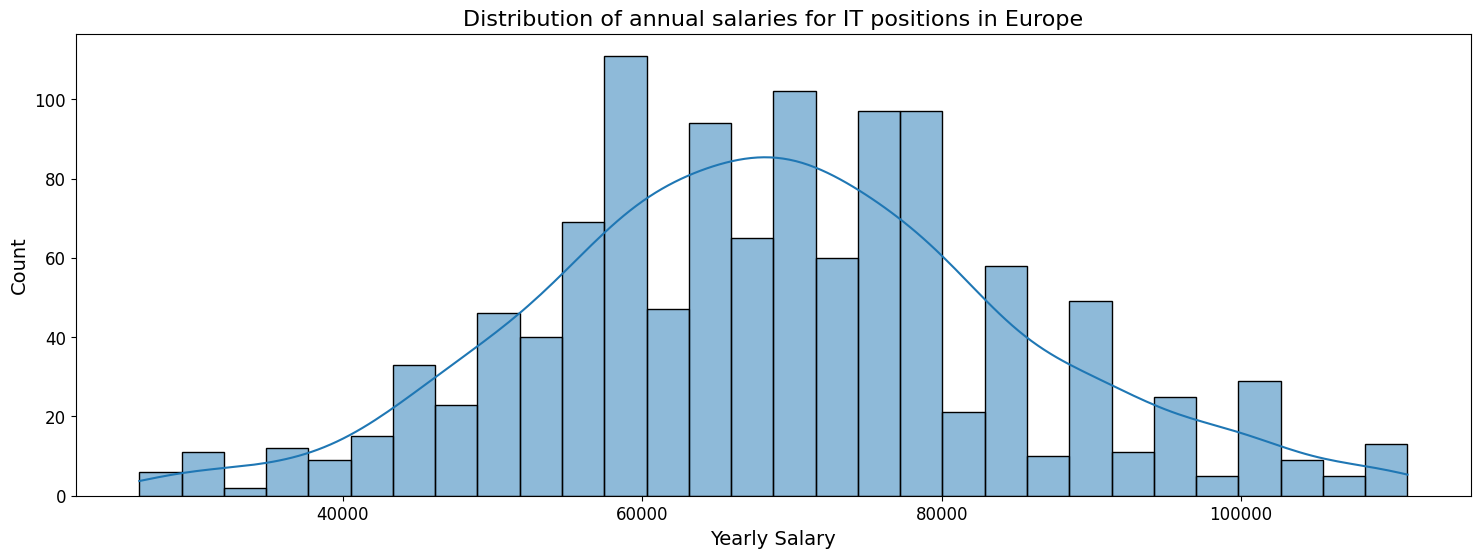

In [15]:
# Distribution of annual salaries for IT positions in Europe

plt.figure(figsize=(18,6))
sns.histplot(data= salary, x= 'Yearly salary', palette= 'magma', kde= True, bins = 30)
plt.title('Distribution of annual salaries for IT positions in Europe',fontsize= 16)
plt.xlabel('Yearly Salary', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize = 12)
plt.show()

# Linear regression analysis can be carried out because the Y Value (Salary) has a normal distribution.

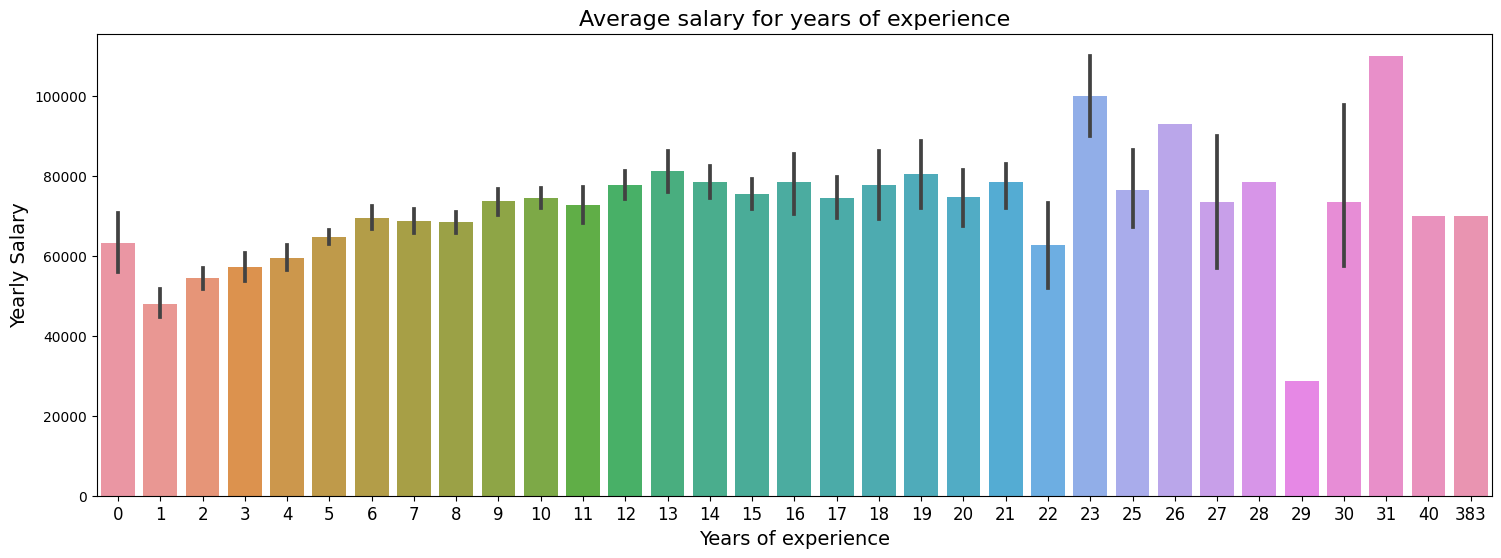

In [16]:
# Plot average salary for years of experience
plt.figure(figsize=(18, 6))
sns.barplot(data= salary, x= 'Years of experience', y= 'Yearly salary')
plt.title('Average salary for years of experience', fontsize= 16)
plt.xlabel('Years of experience', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.xticks(fontsize= 12)
plt.show()

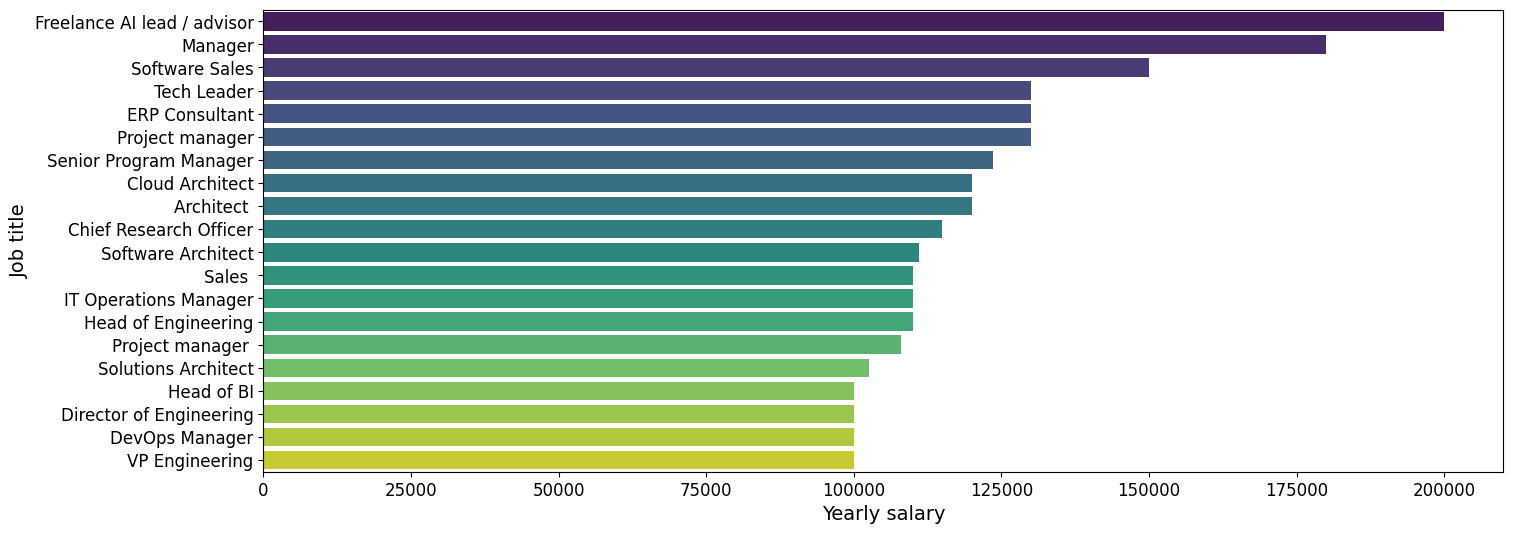

In [17]:
# IT positions with the highest salaries in Europe

position = df.groupby('Position', as_index= False).median().sort_values('Yearly salary', ascending = False).head(20)

plt.figure(figsize= (16 , 6))
sns.barplot(data = position, y = 'Position', x = 'Yearly salary', palette = 'viridis')
plt.xlabel('Yearly salary', fontsize= 14)
plt.ylabel('Job title', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Multiple Linear Regression

In [18]:
df.info()

# Here I use data of the Integer type to enter into the regression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1250 non-null   int32 
 1   Gender               1241 non-null   object
 2   City                 1250 non-null   object
 3   Position             1245 non-null   object
 4   Years of experience  1250 non-null   int32 
 5   Seniority level      1239 non-null   object
 6   Main technology      1124 non-null   object
 7   Other technologies   1095 non-null   object
 8   Yearly salary        1250 non-null   int32 
 9   Vacation days        1250 non-null   int32 
 10  Employment status    1234 non-null   object
 11  Сontract duration    1222 non-null   object
 12  Language at work     1235 non-null   object
 13  Company size         1233 non-null   object
 14  Company type         1226 non-null   object
dtypes: int32(4), object(11)
memory usage: 136.7+ KB


In [19]:
# Select data columns to use in linear regression

dfsalary = df[['Age', 'Years of experience', 'Yearly salary']]
dfsalary.head()

,Age,Years of experience,Yearly salary
0,26,5,80000
1,26,7,80000
2,29,12,120000
3,28,4,54000
4,37,17,62000


In [20]:
dfsalary.describe()

,Age,Years of experience,Yearly salary
count,1250.000000,1250.000000,1250.00000
mean,31.828800,8.911200,71032.28160
std,7.274409,11.864296,24340.67434
min,0.000000,0.000000,10001.00000
25%,28.000000,5.000000,58200.00000
50%,32.000000,8.000000,70000.00000
75%,35.000000,12.000000,80000.00000
max,69.000000,383.000000,300000.00000


In [21]:
# Change the column name so that it is valid in the syntax
dfsalary.rename(columns = {'Yearly salary': 'Salary',
                           'Years of experience': 'Years'}, inplace = True)

In [22]:
# It can be seen that the "Years" column has extreme or outlier values. Then it will be sorted to find out where the outlier.
# The outlier can be seen at index 1103
dfsalary['Years'].sort_values()

225       0
1180      0
1166      0
834       0
340       0
       ... 
1159     30
673      30
955      31
59       40
1103    383
Name: Years, Length: 1250, dtype: int32

In [23]:
# Then outlier will be removed based on the index
dfsalary = dfsalary.drop(index = [1103])

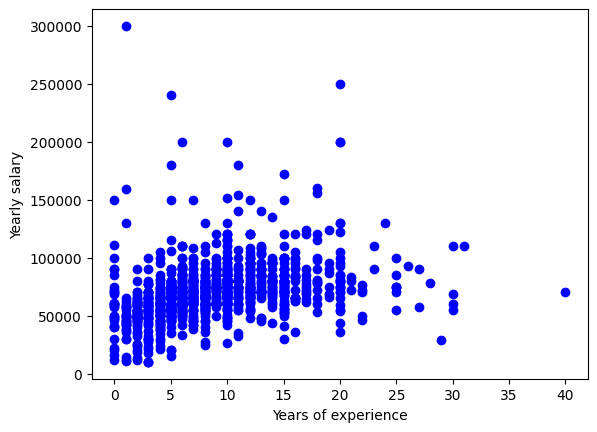

In [24]:
# Plot the relationship between salary and years of work experience
plt.scatter(dfsalary.Years, dfsalary.Salary, color='blue')
plt.xlabel("Years of experience")
plt.ylabel("Yearly salary")
plt.show()

In [25]:
# Checks whether the "Age" column has extreme values or outlier
dfsalary['Age'].sort_values()

904      0
1063     0
829      0
726      0
832      0
        ..
1159    56
232     56
23      59
296     65
59      66
Name: Age, Length: 1249, dtype: int32

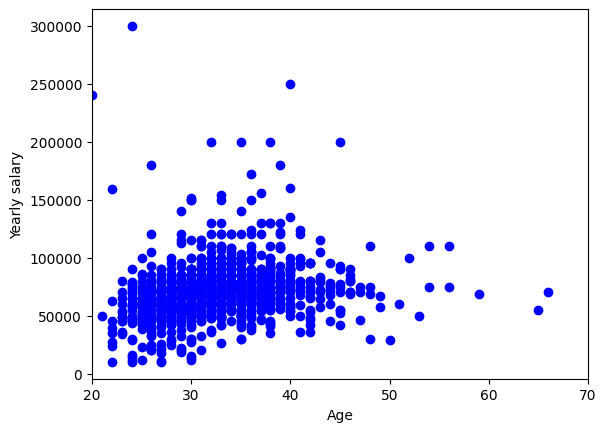

In [26]:
# Plot the relationship between salary and a person's age.

plt.scatter(dfsalary.Age, dfsalary.Salary, color='blue')
plt.xlabel("Age")
plt.ylabel("Yearly salary")
plt.xlim(20, 70)
plt.show()

### Data Modeling

In [27]:
# Create train data distribution
# Around 80% of the entire dataset will be used for train and 20% for test
# np.random.rand() function is useful for selecting rows randomly
msk = np.random.rand(len(dfsalary)) < 0.8
train = dfsalary[msk]
test = dfsalary[~msk]

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Years','Age']])
y = np.asanyarray(train[['Salary']])
regr.fit(x, y)

#The coefficients
print('Coefficients: ', regr.coef_)

# Based on the coefficient result, the conclusion is variable 'Years' has a large contribution to 'Salary', but 'Age' does not.

Coefficients:  [[1865.7968014  -142.16137554]]


### Evaluation

In [29]:
y_hat= regr.predict(test[['Years','Age']]) 
x = np.asanyarray(test[['Years','Age']]) 
y = np.asanyarray(test[['Salary']]) 

print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares (MSE): 364610594.16
Variance score: 0.07


### Model & Evaluation Summary

In [30]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Years','Age']])
y = np.asanyarray(train[['Salary']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)

y_= regr.predict(test[['Years','Age']]) 
x = np.asanyarray(test[['Years','Age']]) 
y = np.asanyarray(test[['Salary']]) 
print("Residual sum of squares (MSE): %.2f" % np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[1865.7968014  -142.16137554]]
Residual sum of squares (MSE): 364610594.16
Variance score: 0.07


### Make a plot for each independent variable to see the slope in the regression model

Text(0, 0.5, 'Yearly salary')

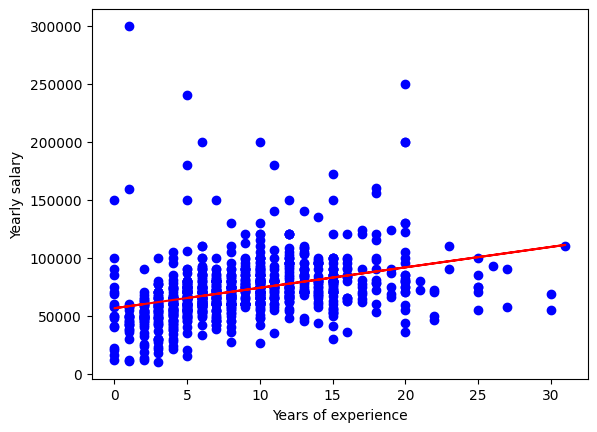

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Years']])
train_y = np.asanyarray(train[['Salary']])
regr.fit(train_x, train_y)

plt.scatter(train.Years, train.Salary, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Years of experience")
plt.ylabel("Yearly salary")

(20.0, 70.0)

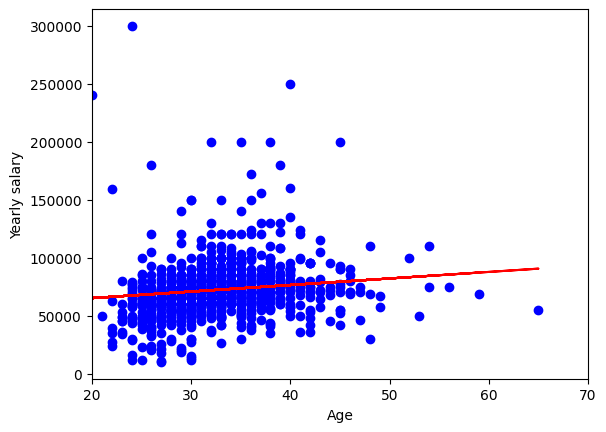

In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Age']])
train_y = np.asanyarray(train[['Salary']])
regr.fit(train_x, train_y)

plt.scatter(train.Age, train.Salary, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Age")
plt.ylabel("Yearly salary")
plt.xlim(20, 70)

**Conclusion:** The factor that has a greater influence on salary in IT positions on the European continent in 2020 is years of experience. Age does not have much influence on salary. So age is not a benchmark in assessing someone's years of experience